#1.load raw data

In [344]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

In [345]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [346]:
# %cd /content/drive/MyDrive/DS班学习资源下载（学生可见）/ecomm
%cd /content/drive/MyDrive/Colab Notebooks/ecomm/ecomm

/content/drive/.shortcut-targets-by-id/1Lya2gl9wovxJADAxlk_sj3gwS-2qsLaU/ecomm


In [347]:
ls

aisles.csv          order_products_prior.csv  products.csv
departments.csv     order_products_train.csv
model_all_data.csv  orders.csv


In [348]:
aisles = pd.read_csv('aisles.csv') 
departments = pd.read_csv('departments.csv') 
order_products_prior = pd.read_csv('order_products_prior.csv') # ?
order_products_train = pd.read_csv('order_products_train.csv') # ?
orders = pd.read_csv('orders.csv') 
products = pd.read_csv('products.csv') 

In [349]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [350]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [351]:
order_products_prior.shape

(793924, 4)

In [352]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1077,13176,1,1
1,1077,39922,2,1
2,1077,5258,3,1
3,1077,21137,4,1
4,1119,6046,1,1


In [353]:
order_products_train.shape

(53704, 4)

In [354]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1363380,50,prior,1,3,9,NaN
1,3131103,50,prior,2,6,12,10.0
2,2197066,50,prior,3,1,13,9.0
3,3201640,50,prior,4,0,11,6.0
4,2756806,50,prior,5,4,14,11.0


In [355]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,8.268300e+04,82683.000000,82683.000000,82683.000000,82683.000000,77683.000000
mean,1.704996e+06,100686.414003,16.854940,2.782265,13.440320,11.233642
std,9.881539e+05,58972.541496,17.452983,2.057409,4.213027,9.231770
min,1.200000e+01,50.000000,1.000000,0.000000,0.000000,0.000000
25%,8.484090e+05,49352.000000,5.000000,1.000000,10.000000,4.000000
50%,1.703840e+06,100665.000000,11.000000,3.000000,13.000000,8.000000
75%,2.555312e+06,150477.000000,23.000000,5.000000,16.000000,16.000000
max,3.421029e+06,206175.000000,100.000000,6.000000,23.000000,30.000000


In [356]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82683 entries, 0 to 82682
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                82683 non-null  int64  
 1   user_id                 82683 non-null  int64  
 2   eval_set                82683 non-null  object 
 3   order_number            82683 non-null  int64  
 4   order_dow               82683 non-null  int64  
 5   order_hour_of_day       82683 non-null  int64  
 6   days_since_prior_order  77683 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.4+ MB


In [357]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [358]:
orders.isnull().sum()

order_id                     0
user_id                      0
eval_set                     0
order_number                 0
order_dow                    0
order_hour_of_day            0
days_since_prior_order    5000
dtype: int64

In [359]:
print(aisles.shape)
print(departments.shape)
print(order_products_prior.shape)
print(order_products_train.shape)
print(orders.shape)
print(products.shape)

(134, 2)
(21, 2)
(793924, 4)
(53704, 4)
(82683, 7)
(49688, 4)


#2.data exploration

In [360]:
#merge two tabel
prio_details=order_products_prior.merge(orders,on='order_id')
prio_details.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,6,8,10.0
1,12,15221,2,1,152610,prior,22,6,8,10.0
2,12,43772,3,1,152610,prior,22,6,8,10.0
3,12,37886,4,1,152610,prior,22,6,8,10.0
4,12,37215,5,0,152610,prior,22,6,8,10.0


In [361]:
prio_details.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,7.939240e+05,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,793924.000000,742704.000000
mean,1.707520e+06,25497.613444,8.440458,0.584587,102180.883412,16.774994,2.742582,13.412193,11.295411
std,9.865040e+05,14105.990241,7.231944,0.492793,59026.239601,17.378097,2.103612,4.223539,8.847302
min,1.200000e+01,1.000000,1.000000,0.000000,50.000000,1.000000,0.000000,0.000000,0.000000
25%,8.540100e+05,13389.000000,3.000000,0.000000,50743.000000,5.000000,1.000000,10.000000,5.000000
50%,1.709141e+06,25069.000000,6.000000,1.000000,102957.000000,11.000000,3.000000,13.000000,8.000000
75%,2.555775e+06,37766.000000,12.000000,1.000000,152215.000000,23.000000,5.000000,16.000000,15.000000
max,3.421029e+06,49683.000000,92.000000,1.000000,206175.000000,99.000000,6.000000,23.000000,30.000000


In [362]:
#fill weekday number with string
prio_details['order_dow']=prio_details['order_dow'].apply(lambda x: 'Monday' if x==1 else x)
prio_details['order_dow']=prio_details['order_dow'].apply(lambda x: 'Tuesday' if x==2 else x)
prio_details['order_dow']=prio_details['order_dow'].apply(lambda x: 'Wed' if x==3 else x)
prio_details['order_dow']=prio_details['order_dow'].apply(lambda x: 'Thrusday' if x==4 else x)
prio_details['order_dow']=prio_details['order_dow'].apply(lambda x: 'Friday' if x==5 else x)
prio_details['order_dow']=prio_details['order_dow'].apply(lambda x: 'Sat' if x==6 else x)
prio_details['order_dow']=prio_details['order_dow'].apply(lambda x: 'Sunday' if x==0 else x)


In [363]:
prio_details.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,Sat,8,10.0
1,12,15221,2,1,152610,prior,22,Sat,8,10.0
2,12,43772,3,1,152610,prior,22,Sat,8,10.0
3,12,37886,4,1,152610,prior,22,Sat,8,10.0
4,12,37215,5,0,152610,prior,22,Sat,8,10.0


##2.1visualization

Text(0.5, 1.0, 'order_frequency')

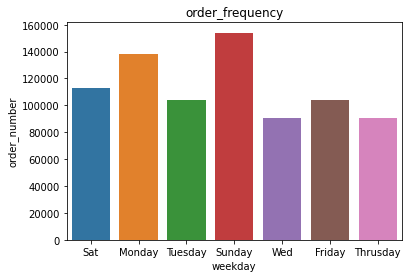

In [364]:
sns.countplot(x='order_dow',data=prio_details)
plt.xlabel('weekday')
plt.ylabel('order_number')
plt.title('order_frequency')
#more people tend to shop online on Sunday

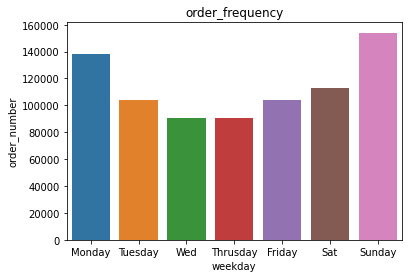

In [365]:
#order the bar with weekday 
sns.countplot(x='order_dow',data=prio_details,
              order=['Monday','Tuesday','Wed','Thrusday','Friday','Sat','Sunday'])
plt.xlabel('weekday')
plt.ylabel('order_number')
plt.title('order_frequency')
plt.show()

In [366]:
order_hours_counts = orders.groupby("order_id")["order_hour_of_day"].mean()

In [367]:
#get a general idea about the time of shopping online 
order_hours_counts

order_id
12          8.0
50         13.0
90         16.0
236        12.0
252        18.0
           ... 
3420895    19.0
3420966    10.0
3420996     9.0
3421018     9.0
3421029    17.0
Name: order_hour_of_day, Length: 82683, dtype: float64

In [368]:
user_order_hour_mean = orders.groupby("order_id")["order_hour_of_day"].mean().reset_index()

In [369]:
user_order_hour_mean 

,order_id,order_hour_of_day
0,12,8.0
1,50,13.0
2,90,16.0
3,236,12.0
4,252,18.0
...,...,...
82678,3420895,19.0
82679,3420966,10.0
82680,3420996,9.0
82681,3421018,9.0


In [370]:
#calculate how many order are placed in each hour of the day
hour_counts=user_order_hour_mean['order_hour_of_day'].value_counts()

In [371]:
hour_counts.index

Float64Index([11.0, 10.0, 14.0, 12.0, 15.0, 13.0, 16.0,  9.0, 17.0, 18.0,  8.0,
              19.0, 20.0,  7.0, 21.0, 22.0, 23.0,  6.0,  0.0,  1.0,  5.0,  2.0,
               3.0,  4.0],
             dtype='float64')

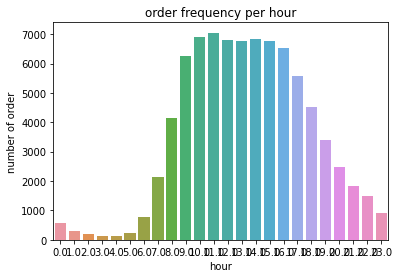

In [372]:
#visualize the result of purchasing frequency for each hour of the day
sns.barplot(x=hour_counts.index,y=hour_counts.values)
plt.title('order frequency per hour')
plt.xlabel('hour')
plt.ylabel('number of order')
plt.show()

In [373]:
prio_details.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,Sat,8,10.0
1,12,15221,2,1,152610,prior,22,Sat,8,10.0
2,12,43772,3,1,152610,prior,22,Sat,8,10.0
3,12,37886,4,1,152610,prior,22,Sat,8,10.0
4,12,37215,5,0,152610,prior,22,Sat,8,10.0


In [374]:
reorder=prio_details.groupby(['reordered'])['days_since_prior_order'].mean()
#get average interval between two purchase for group of repurchased and not repurchased customer

In [375]:
reorder.index

Int64Index([0, 1], dtype='int64', name='reordered')

In [376]:
reorder

reordered
0    12.748634
1    10.423117
Name: days_since_prior_order, dtype: float64

Text(0, 0.5, 'mean_day since last order')

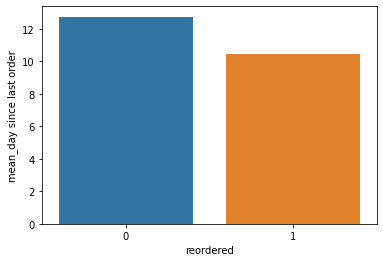

In [377]:
sns.barplot(x=reorder.index,y=reorder.values)
plt.ylabel('mean_day since last order')


In [378]:
prio_details['user_id'].nunique()

5000

In [379]:
prio_details['order_id'].nunique()

77683

In [380]:
prio_details[prio_details['reordered']==0][['days_since_prior_order','reordered']]

,days_since_prior_order,reordered
4,10.0,0
6,10.0,0
7,10.0,0
8,10.0,0
10,10.0,0
...,...,...
793905,9.0,0
793909,9.0,0
793910,9.0,0
793919,21.0,0


In [381]:
reorder_rate=prio_details.groupby(['order_dow','order_hour_of_day'])['reordered'].mean().reset_index()

In [382]:
reorder_rate

,order_dow,order_hour_of_day,reordered
0,Friday,0,0.567251
1,Friday,1,0.572034
2,Friday,2,0.550388
3,Friday,3,0.535354
4,Friday,4,0.496183
...,...,...,...
163,Wed,19,0.596164
164,Wed,20,0.578599
165,Wed,21,0.540113
166,Wed,22,0.573974


In [383]:
reorder_rate=reorder_rate.pivot(index='order_dow', columns='order_hour_of_day',values='reordered')

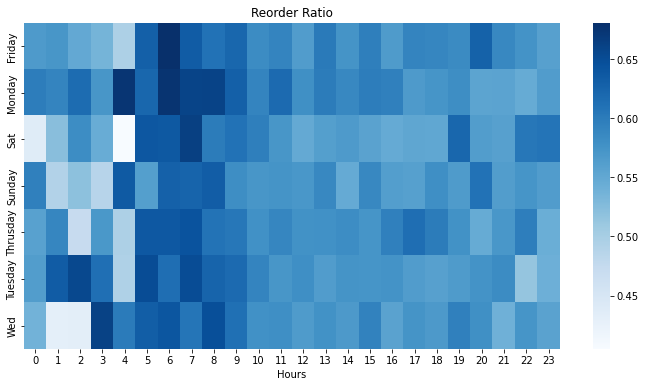

In [384]:
plt.figure(figsize=(12,6))
sns.heatmap(reorder_rate,cmap="Blues")
plt.title("Reorder Ratio")
plt.ylabel("")
plt.xlabel("Hours")

plt.show()

##2.2 data quick check

In [385]:
#check if all dataset have consistant record 

print("Value size of the order dataset: ", orders.shape[0])
print("NaN count in days_since_prior_order column: ", orders[orders.days_since_prior_order.isnull()].shape[0])

print("order_number 1 count in orders table: ", orders[orders.order_number == 1].drop_duplicates().shape[0])
print("user_id count in orders table: ", orders.user_id.drop_duplicates().shape[0])


Value size of the order dataset:  82683
NaN count in days_since_prior_order column:  5000
order_number 1 count in orders table:  5000
user_id count in orders table:  5000


In [386]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1363380,50,prior,1,3,9,NaN
1,3131103,50,prior,2,6,12,10.0
2,2197066,50,prior,3,1,13,9.0
3,3201640,50,prior,4,0,11,6.0
4,2756806,50,prior,5,4,14,11.0


2.2.Validate Valid orders matching in the prior table

In [387]:
orders.eval_set.value_counts()

prior    77683
train     5000
Name: eval_set, dtype: int64

In [388]:
orders.groupby(['eval_set'],as_index=False).agg(OrderedDict([('order_id','nunique')]))
print("order_id from prior found in orders: ", order_products_prior[order_products_prior.order_id.isin(orders.order_id)].order_id.nunique())

order_id from prior found in orders:  77683


In [389]:
print('number of unique rows in prio dataset',order_products_prior['order_id'].nunique())
# print('number of rows prio in order',order_products_prior['order_id'].isin(orders.order_id).count())##会count到重复值 
print('number of rows prio in orderdataset',order_products_prior[order_products_prior.order_id.isin(orders.order_id)].order_id.nunique())

number of unique rows in prio dataset 77683
number of rows prio in orderdataset 77683


2.3. Validate orders matching in the train table

In [390]:
print("orders count in train: ", order_products_train['order_id'].nunique())
print("order_id from train found in orders: ", order_products_train[order_products_train.order_id.isin(orders.order_id)].order_id.nunique())

orders count in train:  5000
order_id from train found in orders:  5000


In [391]:
print('unique order id',order_products_train['order_id'].nunique())
print('train_order id in order',order_products_train[order_products_train.order_id.isin(orders.order_id)].order_id.nunique())

unique order id 5000
train_order id in order 5000


2.4. Validate the intersection between prior and train table

In [392]:
order_products_prior.merge(order_products_train,on='order_id').shape[0]

0

In [393]:
order_products_prior.merge(order_products_train,on='order_id').shape[1]

7

 Validate the user_id matching in prior and train set

In [394]:
orders.eval_set.value_counts()#

prior    77683
train     5000
Name: eval_set, dtype: int64

In [395]:
orders.groupby('eval_set',as_index=False).agg(OrderedDict([('user_id','nunique')]))#make sure user match between two table

,eval_set,user_id
0,prior,5000
1,train,5000


In [396]:
priod_user_id=set(orders[orders.eval_set=='prior']['user_id'])
train_user_id=set(orders[orders.eval_set=='train']['user_id'])
print('number of user in prio',len(priod_user_id))
print('number of user in prio',len(train_user_id))

print('same customer in train and prio',len(priod_user_id.intersection(train_user_id)))

number of user in prio 5000
number of user in prio 5000
same customer in train and prio 5000


#3.Feature Engineering

In [397]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products_prior.csv')
order_products_train = pd.read_csv('order_products_train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
#reorder -- if customer purchased this product before  label will be 1 else be 0

In [398]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1077,13176,1,1
1,1077,39922,2,1
2,1077,5258,3,1
3,1077,21137,4,1
4,1119,6046,1,1


##3.1 Construct Model Label

In [399]:
# build a new feature of combination for user_id and product id
train_details = order_products_train.merge(orders, on = 'order_id')
train_user_ids = set(orders[orders['eval_set'] == 'train']['user_id'])
train_unique_key = train_details['user_id'].astype('str') + '_' + train_details['product_id'].astype('str')
#创造一个新的feature 

In [400]:
train_unique_key.head()

0    173934_13176
1    173934_39922
2     173934_5258
3    173934_21137
4     129386_6046
dtype: object

In [401]:
# (2) 
prior_details = order_products_prior.merge(orders, on = 'order_id')

In [402]:
prior_details.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,6,8,10.0
1,12,15221,2,1,152610,prior,22,6,8,10.0
2,12,43772,3,1,152610,prior,22,6,8,10.0
3,12,37886,4,1,152610,prior,22,6,8,10.0
4,12,37215,5,0,152610,prior,22,6,8,10.0


In [403]:
#（3）
model_all_data = prior_details[prior_details.user_id.isin(train_user_ids)][['reordered','user_id','product_id','order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]
model_all_data = model_all_data.drop_duplicates(subset=['user_id', 'product_id']) 
model_all_data['unique_key'] = model_all_data['user_id'].astype('str') + '_' + model_all_data['product_id'].astype('str')

In [404]:
#（4）
model_all_data['label'] = 0
model_all_data.loc[model_all_data.unique_key.isin(train_unique_key), 'label'] = 1 

In [405]:
model_all_data[['reordered','label']].value_counts()

reordered  label
0          0        227287
1          0         70180
           1         16870
0          1         15469
dtype: int64

In [406]:
model_all_data.head()

,reordered,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label
0,1,152610,30597,22,6,8,10.0,152610_30597,0
1,1,152610,15221,22,6,8,10.0,152610_15221,0
2,1,152610,43772,22,6,8,10.0,152610_43772,0
3,1,152610,37886,22,6,8,10.0,152610_37886,0
4,0,152610,37215,22,6,8,10.0,152610_37215,0


In [407]:
model_all_data.shape

(329806, 9)

In [408]:
model_all_data=model_all_data.drop(['reordered'],axis=1)

##3.2. Construct Model Features


2.1. Feature Group 1: user-product activity features

In [409]:
user_product_features = ['user_product__total_orders',
                         'user_product__add_to_cart_order_mean',
                         'user_product__reordered_mean',
                         'user_product__most_dow',
                         'user_product__most_hod']

In [410]:
prior_details.reordered.value_counts()

1    464118
0    329806
Name: reordered, dtype: int64

In [411]:
prior_details.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,12,30597,1,1,152610,prior,22,6,8,10.0
1,12,15221,2,1,152610,prior,22,6,8,10.0
2,12,43772,3,1,152610,prior,22,6,8,10.0
3,12,37886,4,1,152610,prior,22,6,8,10.0
4,12,37215,5,0,152610,prior,22,6,8,10.0


In [412]:
df_user_product_features=(prior_details.groupby(['product_id','user_id'],as_index=False)
                                           .agg(OrderedDict(
                                                     [('order_id','count'),
                                                      ('add_to_cart_order','mean'),
                                                      ('reordered','mean'),
                                                      ('order_dow',(lambda x:x.mode()[0])),
                                                      ('order_hour_of_day',(lambda x:x.mode()[0]))])))

df_user_product_features.columns=['product_id','user_id']+user_product_features


In [413]:
df_user_product_features.head()

,product_id,user_id,user_product__total_orders,user_product__add_to_cart_order_mean,user_product__reordered_mean,user_product__most_dow,user_product__most_hod
0,1,21285,1,3.0,0.00,0,15
1,1,47549,4,4.0,0.75,2,14
2,1,54136,1,3.0,0.00,2,13
3,1,54240,1,2.0,0.00,2,16
4,1,95730,1,1.0,0.00,1,14


In [414]:
prior_details.loc[(prior_details['user_id']==47549)&(prior_details['product_id']==1),['user_id','product_id','reordered']]


,user_id,product_id,reordered
481153,47549,1,0
607887,47549,1,1
684997,47549,1,1
782435,47549,1,1


In [415]:
model_all_data = model_all_data.merge(df_user_product_features, on = ['user_id', 'product_id'])#把新的feature 加回去

In [416]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,user_product__reordered_mean,user_product__most_dow,user_product__most_hod
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.00,0.800,6,13
1,152610,15221,22,6,8,10.0,152610_15221,0,8,8.25,0.875,4,9
2,152610,43772,22,6,8,10.0,152610_43772,0,2,3.00,0.500,5,8
3,152610,37886,22,6,8,10.0,152610_37886,0,2,3.50,0.500,6,8
4,152610,37215,22,6,8,10.0,152610_37215,0,1,5.00,0.000,6,8


2.2. Feature Group 2: product features 

In [417]:
product_features = ['product__total_orders',
                     'product__add_to_cart_order_mean',
                     'product__total_users',
                     'product__reordered_mean',
                     'product__most_dow',
                     'product__most_hod',
                     'product__days_since_prior_order_mean'
                     ]

In [418]:
df_product_features=(prior_details.groupby(['product_id'],as_index=False)
                                          .agg(OrderedDict(
                                            [('order_id','nunique'),
                                            ('add_to_cart_order','mean'),
                                            ('user_id','nunique'),
                                            ('reordered','mean'),
                                            ('order_dow',(lambda x: x.mode()[0])),
                                            ('order_hour_of_day',(lambda x: x.mode()[0])),
                                            ('days_since_prior_order','mean')
                                            ])))
df_product_features.columns = ['product_id'] + product_features

In [419]:
df_product_features.head()

,product_id,product__total_orders,product__add_to_cart_order_mean,product__total_users,product__reordered_mean,product__most_dow,product__most_hod,product__days_since_prior_order_mean
0,1,26,4.576923,12,0.538462,3,10,16.280000
1,2,1,3.000000,1,0.000000,4,12,2.000000
2,3,1,4.000000,1,0.000000,4,17,30.000000
3,4,10,8.100000,5,0.500000,1,9,21.888889
4,8,1,25.000000,1,0.000000,0,13,30.000000


In [420]:
model_all_data = model_all_data.merge(df_product_features, on = ['product_id'])

In [421]:
model_all_data = model_all_data.merge(products[['product_id','aisle_id', 'department_id']], on = ['product_id'])#只merge product里面特定的几列---

In [422]:
model_all_data.head().shape

(5, 22)

In [423]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,...,user_product__most_hod,product__total_orders,product__add_to_cart_order_mean,product__total_users,product__reordered_mean,product__most_dow,product__most_hod,product__days_since_prior_order_mean,aisle_id,department_id
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.000000,...,13,85,4.2,23,0.729412,3,9,12.592593,53,16
1,112604,30597,15,3,10,1.0,112604_30597,0,5,3.800000,...,10,85,4.2,23,0.729412,3,9,12.592593,53,16
2,75304,30597,28,2,8,12.0,75304_30597,0,2,29.000000,...,8,85,4.2,23,0.729412,3,9,12.592593,53,16
3,22499,30597,20,4,9,30.0,22499_30597,1,18,2.722222,...,9,85,4.2,23,0.729412,3,9,12.592593,53,16
4,190626,30597,11,1,9,14.0,190626_30597,0,9,2.111111,...,9,85,4.2,23,0.729412,3,9,12.592593,53,16


In [424]:
model_all_data.rename(columns={'aisle_id': 'product__aisle_id', 'department_id': 'product__department_id'}, inplace=True)

2.3. Feature Group 3: user features


In [425]:
user_features = ['user__order_count',
                  'user__product_count',
                  'user__days_since_prior_order_mean',
                  'user__reordered_mean',
                  'user__most_dow',
                  'user__most_hod',
                  ]

In [426]:
df_user_features = (prior_details.groupby(['user_id'],as_index=False)
                                           .agg(OrderedDict(
                                                   [('order_id','nunique'), #total number of orders of customer 
                                                    ('product_id','count'), #total number of products purchase
                                                    ('days_since_prior_order','mean'), #mean interval between purchase
                                                    ('reordered', 'mean'), #reoder rate of customer
                                                    ('order_dow', (lambda x: x.mode()[0])), #most frequent day of place order
                                                    ('order_hour_of_day', (lambda x: x.mode()[0])), #most frequent time of place order
                                                    ])))
df_user_features.columns = ['user_id'] + user_features

In [427]:
model_all_data = model_all_data.merge(df_user_features, on = ['user_id'])

In [428]:
model_all_data['label'].value_counts()

0    297467
1     32339
Name: label, dtype: int64

In [429]:
model_all_data.shape#total 29 features after feature engineering

(329806, 28)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/ecomm

In [ ]:
# Save the model_all_data dataframe as csv file to the file path we selected above.
model_all_data.to_csv('model_all_data.csv', index=False)

#4.modeling part

##4.1 load data

In [430]:
import warnings
warnings.filterwarnings("ignore")

In [431]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import keras
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier

In [432]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [433]:
cd /content/drive/MyDrive/Colab Notebooks/ecomm

/content/drive/MyDrive/Colab Notebooks/ecomm


In [434]:
ls

 ecomm@
'“eCommerce Product Recommendation - Part 3.ipynb”的副本'
 friends_noHeader.csv
 model_all_data.csv
'part1 git.ipynb'
'“Recommendation_System_eCommerce_Part One.ipynb”run'
'“Recommendation_System_eCommerce_Part Two1.ipynb”'
'self prac version'/


In [435]:
model_all_data = pd.read_csv('model_all_data.csv')

In [436]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,...,product__most_hod,product__days_since_prior_order_mean,product__aisle_id,product__department_id,user__order_count,user__product_count,user__days_since_prior_order_mean,user__reordered_mean,user__most_dow,user__most_hod
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.00,...,9,12.592593,53,16,26,408,10.953804,0.375,6,12
1,152610,15221,22,6,8,10.0,152610_15221,0,8,8.25,...,12,13.653846,84,16,26,408,10.953804,0.375,6,12
2,152610,43772,22,6,8,10.0,152610_43772,0,2,3.00,...,12,12.008565,83,4,26,408,10.953804,0.375,6,12
3,152610,37886,22,6,8,10.0,152610_37886,0,2,3.50,...,14,11.489362,53,16,26,408,10.953804,0.375,6,12
4,152610,37215,22,6,8,10.0,152610_37215,0,1,5.00,...,13,11.490066,98,7,26,408,10.953804,0.375,6,12


In [437]:
model_all_data.columns

Index(['user_id', 'product_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'unique_key', 'label',
       'user_product__total_orders', 'user_product__add_to_cart_order_mean',
       'user_product__reordered_mean', 'user_product__most_dow',
       'user_product__most_hod', 'product__total_orders',
       'product__add_to_cart_order_mean', 'product__total_users',
       'product__reordered_mean', 'product__most_dow', 'product__most_hod',
       'product__days_since_prior_order_mean', 'product__aisle_id',
       'product__department_id', 'user__order_count', 'user__product_count',
       'user__days_since_prior_order_mean', 'user__reordered_mean',
       'user__most_dow', 'user__most_hod'],
      dtype='object')

In [438]:
unique_key = ['user_id', 'product_id']
raw_features = ['order_number',
                     'order_dow',
                     'order_hour_of_day',
                     'days_since_prior_order',
                     'user_product__total_orders',
                     'user_product__add_to_cart_order_mean',
                     'user_product__reordered_mean',
                     'user_product__most_dow',
                     'user_product__most_hod',
                     'product__total_orders',
                     'product__add_to_cart_order_mean',
                     'product__total_users',
                     'product__reordered_mean',
                     'product__most_dow',
                     'product__most_hod',
                     'product__days_since_prior_order_mean',
                     'user__order_count',
                     'user__product_count',
                     'user__days_since_prior_order_mean',
                     'user__reordered_mean',
                     'user__most_dow',
                     'user__most_hod',
                     'product__aisle_id',
                     'product__department_id',
                     ]
label = ['label']

In [439]:
model_all_data = model_all_data[unique_key + raw_features + label]

In [440]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_product__total_orders,user_product__add_to_cart_order_mean,user_product__reordered_mean,user_product__most_dow,...,product__days_since_prior_order_mean,user__order_count,user__product_count,user__days_since_prior_order_mean,user__reordered_mean,user__most_dow,user__most_hod,product__aisle_id,product__department_id,label
0,152610,30597,22,6,8,10.0,5,2.00,0.800,6,...,12.592593,26,408,10.953804,0.375,6,12,53,16,0
1,152610,15221,22,6,8,10.0,8,8.25,0.875,4,...,13.653846,26,408,10.953804,0.375,6,12,84,16,0
2,152610,43772,22,6,8,10.0,2,3.00,0.500,5,...,12.008565,26,408,10.953804,0.375,6,12,83,4,0
3,152610,37886,22,6,8,10.0,2,3.50,0.500,6,...,11.489362,26,408,10.953804,0.375,6,12,53,16,0
4,152610,37215,22,6,8,10.0,1,5.00,0.000,6,...,11.490066,26,408,10.953804,0.375,6,12,98,7,0


## 4.2  Feature Data Analysis & Tranformation

 Label Ratio

In [441]:
label_count = model_all_data.label.value_counts()
print("Negative label count: ", label_count[0])
print("Positive label count: ", label_count[1])
print("Positive label rate is {:.2f}%".format(
      label_count[1] / (label_count[0] + label_count[1]) * 100) )


Negative label count:  297467
Positive label count:  32339
Positive label rate is 9.81%


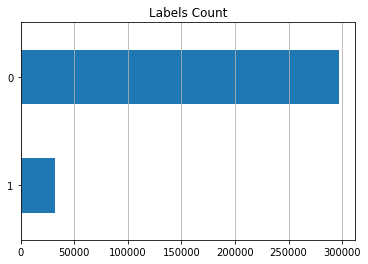

In [442]:
ax = label_count.sort_values().plot(kind='barh', title='Labels Count')
ax.grid(axis="x")
#balanced data

Null value check

In [443]:
model_all_data.isna().sum()

user_id                                     0
product_id                                  0
order_number                                0
order_dow                                   0
order_hour_of_day                           0
days_since_prior_order                  29995
user_product__total_orders                  0
user_product__add_to_cart_order_mean        0
user_product__reordered_mean                0
user_product__most_dow                      0
user_product__most_hod                      0
product__total_orders                       0
product__add_to_cart_order_mean             0
product__total_users                        0
product__reordered_mean                     0
product__most_dow                           0
product__most_hod                           0
product__days_since_prior_order_mean      726
user__order_count                           0
user__product_count                         0
user__days_since_prior_order_mean           0
user__reordered_mean              

Categorical Feature Transformation

In [444]:
# One-hot encoding for the `product__department_id` feature.
model_all_data = pd.concat(
    [model_all_data.drop('product__department_id',axis=1),
     pd.get_dummies(model_all_data["product__department_id"],
                    prefix='product__department_id_')],
                     axis=1)


##4.3 Data partition to Train Validation and Test 

In order to do model training, model selection and evaluation, we split `model_all_data` to three parts: train, validation, test.

In [445]:
# We randomly select 20% users as test data. 
# The remaining data will be used as train & validation data.
test_user_ids = model_all_data.user_id.drop_duplicates().sample(frac=0.2)

train_validation_data = model_all_data[~model_all_data.user_id.isin(test_user_ids)]##继续确保 id 是不在tets里的
test_data = model_all_data[model_all_data.user_id.isin(test_user_ids)]

In [449]:
model_all_data.shape

(329806, 47)

In [450]:
train_validation_data.shape

(262026, 47)

In [451]:
test_data.shape

(67780, 47)

## 4.4  Model Selection with Cross Validation

In [452]:
train_validation_data_x = train_validation_data.drop(['user_id', 'product_id', 'label'],axis=1)
train_validation_data_y = train_validation_data['label']

In [453]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ]

In [454]:
def build_ml_pipeline(classifier):
  steps = list()
  steps.append(('fillnan', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.0)))
  steps.append(('downSample', RandomUnderSampler()))
  steps.append(('scaler', MinMaxScaler()))
  steps.append(('model', classifier))
  pipeline = Pipeline(steps=steps)
  return pipeline


In [455]:
#print out model performance and latency
for classifier in classifiers:
  pipeline = build_ml_pipeline(classifier)
  %time scores = cross_val_score(pipeline, train_validation_data_x, train_validation_data_y, cv=5, scoring='f1')
  print(classifier.__class__.__name__, ': F1 value is %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))
  print('==============')

#use f1 score as metrics


CPU times: user 10.6 s, sys: 4.74 s, total: 15.4 s
Wall time: 11.6 s
LogisticRegression : F1 value is 34.708 (2.635)
CPU times: user 7.62 s, sys: 107 ms, total: 7.73 s
Wall time: 8.64 s
DecisionTreeClassifier : F1 value is 24.691 (1.163)
CPU times: user 1min 8s, sys: 419 ms, total: 1min 9s
Wall time: 1min 12s
RandomForestClassifier : F1 value is 33.678 (2.972)
CPU times: user 33.7 s, sys: 280 ms, total: 34 s
Wall time: 35.9 s
AdaBoostClassifier : F1 value is 34.384 (3.323)
CPU times: user 1min 57s, sys: 282 ms, total: 1min 57s
Wall time: 2min 8s
GradientBoostingClassifier : F1 value is 35.162 (3.449)


## 4.5 Feature Selection
 for speed up model trainning

In [456]:
pipeline = build_ml_pipeline(GradientBoostingClassifier())
pipeline.fit(train_validation_data_x, train_validation_data_y)

Pipeline(steps=[('fillnan', SimpleImputer(fill_value=0.0, strategy='constant')),
                ('downSample', RandomUnderSampler()),
                ('scaler', MinMaxScaler()),
                ('model', GradientBoostingClassifier())])

In [457]:
importances = pipeline.steps[3][1].feature_importances_
feature_names=train_validation_data_x.columns.tolist()

In [458]:
df_importances = pd.DataFrame(
    {"feature":feature_names, "importance":importances}).sort_values("importance", ascending=False)
top15_features = df_importances.head(15)    

In [459]:
# Only use the selected top 15 features in our training data.
train_validation_data_x_select_features = train_validation_data_x[top15_features['feature']]

In [460]:
top15_features

,feature,importance
4,user_product__total_orders,0.373422
16,user__order_count,0.291045
6,user_product__reordered_mean,0.144852
0,order_number,0.074938
12,product__reordered_mean,0.063082
19,user__reordered_mean,0.015316
9,product__total_orders,0.010660
3,days_since_prior_order,0.006081
18,user__days_since_prior_order_mean,0.003600
35,product__department_id__13,0.003180


##4.6 Train Neural Network Model

In [461]:
# Feed forward neural network
def create_model():
    model = keras.Sequential([
        ### layer input
        keras.layers.Dense(30, input_dim=15, activation='relu'),
        ###  layer 1
        keras.layers.Dense(15, activation='relu'),
        ###  layer 2
        keras.layers.Dense(5, activation='relu'),
        ### layer output
        keras.layers.Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

In [462]:
NN_model = KerasClassifier(build_fn=create_model, epochs=64, batch_size=32, verbose=0)

In [463]:
keras_model = create_model()

In [464]:
keras_model = create_model()

In [465]:
print(keras_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                480       
                                                                 
 dense_5 (Dense)             (None, 15)                465       
                                                                 
 dense_6 (Dense)             (None, 5)                 80        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,031
Trainable params: 1,031
Non-trainable params: 0
_________________________________________________________________
None


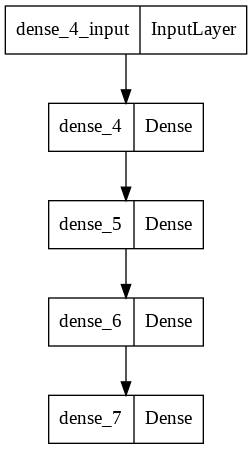

In [466]:
plot_model(keras_model)

4.7  Model Selection with Selected Top 15 Features including Neural Network Model

In [467]:
# Add our neural network model to our classifiers list.
classifiers.append(NN_model)

In [468]:
for classifier in classifiers:
  pipeline = build_ml_pipeline(classifier)
  %time scores = cross_val_score(pipeline, train_validation_data_x_select_features, train_validation_data_y, cv=5, scoring='f1')
  print(classifier.__class__.__name__, ': F1 value is %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))
  print('==============')


  # NN_model：
  # F1 = 34.941, slightly lower than gradient boost of 35.177. But, the variance of the NN_model F1 is 1.284.

CPU times: user 5.35 s, sys: 3.27 s, total: 8.62 s
Wall time: 5.59 s
LogisticRegression : F1 value is 34.609 (2.659)
CPU times: user 4.13 s, sys: 105 ms, total: 4.24 s
Wall time: 4.16 s
DecisionTreeClassifier : F1 value is 24.718 (1.319)
CPU times: user 1min, sys: 326 ms, total: 1min 1s
Wall time: 1min 3s
RandomForestClassifier : F1 value is 33.647 (3.259)
CPU times: user 19.6 s, sys: 227 ms, total: 19.8 s
Wall time: 20.5 s
AdaBoostClassifier : F1 value is 34.644 (3.065)
CPU times: user 1min 8s, sys: 187 ms, total: 1min 8s
Wall time: 1min 14s
GradientBoostingClassifier : F1 value is 35.138 (3.377)
1638/1638 [==============================] - 2s 1ms/step
CPU times: user 15min 54s, sys: 1min 5s, total: 16min 59s
Wall time: 15min 31s
KerasClassifier : F1 value is 34.802 (0.658)


#5.Hyper-parameter tuning for GradientBoostingClassifier

In [469]:
sample_user_ids = train_validation_data.user_id.drop_duplicates().sample(frac=0.05)
train_validation_data_sample = train_validation_data[train_validation_data.user_id.isin(sample_user_ids)]

In [470]:
train_validation_data_sample_x = train_validation_data_sample.drop(['user_id', 'product_id', 'label'],axis=1)[top15_features['feature']]
train_validation_data_sample_y = train_validation_data_sample['label']

In [471]:
param_grid = {
    'model__n_estimators': [100,150],
    'model__max_depth': [4,6],
    'model__min_samples_split': [2,4,6],
    'model__learning_rate': [0.005, 0.01],
}

#这一步是需要注意滴 不同的模型 hyperpa 是不样的 
#而且需要知道区间 否则太久 

In [472]:
grid = GridSearchCV(build_ml_pipeline(GradientBoostingClassifier()), cv=5, param_grid=param_grid, scoring='f1')
grid.fit(train_validation_data_sample_x, train_validation_data_sample_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('fillnan',
                                        SimpleImputer(fill_value=0.0,
                                                      strategy='constant')),
                                       ('downSample', RandomUnderSampler()),
                                       ('scaler', MinMaxScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.005, 0.01],
                         'model__max_depth': [4, 6],
                         'model__min_samples_split': [2, 4, 6],
                         'model__n_estimators': [100, 150]},
             scoring='f1')

In [473]:
print("Best F1 value is %.3f" % grid.best_score_)
print("Params are %s" % grid.best_params_)

Best F1 value is 0.336
Params are {'model__learning_rate': 0.005, 'model__max_depth': 4, 'model__min_samples_split': 6, 'model__n_estimators': 100}


#6. Train the final GradientBoostingClassifier

6.1. Train the final model with all training+validation data and the best hyper-parameters.

In [474]:
pipeline = build_ml_pipeline(GradientBoostingClassifier(
    n_estimators=100,
    min_samples_split=2,
    max_depth=4,
    learning_rate=0.005,
))

pipeline.fit(train_validation_data_x_select_features, train_validation_data_y)

Pipeline(steps=[('fillnan', SimpleImputer(fill_value=0.0, strategy='constant')),
                ('downSample', RandomUnderSampler()),
                ('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.005, max_depth=4))])

In [475]:
importances = pipeline.steps[3][1].feature_importances_
feature_names=train_validation_data_x_select_features.columns.tolist()
df_importances = pd.DataFrame(
    {"feature":feature_names, "importance":importances}).sort_values("importance", ascending=False)
df_importances.head(15)

,feature,importance
2,user_product__reordered_mean,0.319415
0,user_product__total_orders,0.311168
1,user__order_count,0.311113
3,order_number,0.030490
4,product__reordered_mean,0.025282
8,user__days_since_prior_order_mean,0.001432
7,days_since_prior_order,0.000759
6,product__total_orders,0.000341
5,user__reordered_mean,0.000000
9,product__department_id__13,0.000000


# 7. Evaluate model on Test Data

7.1. Predict product reorder on Test Data

In [476]:
test_data_x_selected_features = test_data.drop(['user_id', 'product_id', 'label'],axis=1)[top15_features['feature']]
test_data_y = test_data['label']

In [477]:
predict_y = pipeline.predict(test_data_x_selected_features)

In [478]:
df_output = pd.DataFrame(
    {"user_id":test_data.user_id, "product_id":test_data.product_id, "predict":predict_y, "label":test_data.label})   

In [479]:
df_output.head()

,user_id,product_id,predict,label
1328,135743,30597,0,0
1329,135743,29471,0,0
1330,135743,44632,0,1
1331,135743,21709,1,1
1332,135743,20682,0,0


In [480]:
predict_y_prob = pipeline.predict_proba(test_data_x_selected_features)[:,1]

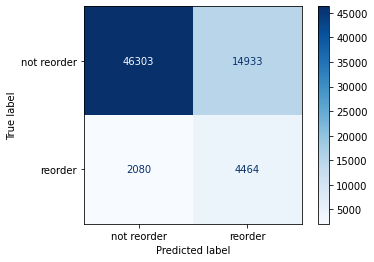

In [481]:
plot_confusion_matrix(pipeline, test_data_x_selected_features, test_data_y,
                      display_labels=["not reorder","reorder"],cmap=plt.cm.Blues)

In [482]:
acc = accuracy_score(test_data_y, predict_y)
f1 = f1_score(test_data_y, predict_y)
pre = precision_score(test_data_y, predict_y)
rec = recall_score(test_data_y, predict_y)
auc = roc_auc_score(test_data_y, predict_y_prob)

In [483]:
print("Model evaluation result on test data: ")
print("F1 Score : {:.4%}".format(f1))
print("ROC AUC : {:.4%}".format(auc))
print("Accuracy : {:.4%}".format(acc))
print("Precision : {:.4%}".format(pre))
print("Recall : {:.4%}".format(rec))

Model evaluation result on test data: 
F1 Score : 34.4166%
ROC AUC : 79.3417%
Accuracy : 74.8997%
Precision : 23.0139%
Recall : 68.2152%
